In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def load_datasets(filename, column_list, target_column):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    column_list - список назв колонок-характеристик
    target_column - назва колонки з цільовою величиною
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y

In [37]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [38]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()


In [39]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X_new - набір нормалізованих характеристик, (X-mean)/std
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean) / std
    return X_new, mean, std

In [40]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [41]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів theta.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    return np.dot(X, theta)

In [42]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    return (1 / (2 * m)) * sum(np.power(hypothesis(X, theta) - y, 2))

In [43]:
def derivative(X, y, theta):
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    m = X.shape[0]
    return (1 / m) * np.dot(X.T, hypothesis(X, theta) - y)

In [44]:
def gradient_descent(X, y, theta, alpha, max_num_iters, eps):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    eps - задана точність
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    
    1) J_i (theta_0, theta_1)
    2)  theta_0 = theta_0 - alpha*dtheta_0
        theta_1 = theta_1 - alpha*dtheta_1
        |J_i-J_{i-1}| < eps || num_iters>10000000000 -> break
    3) goto 1
    '''
    J_history = []
    J = cost_function(X, y, theta)
    J_history.append(J)
    
    for i in range(max_num_iters):
        theta = theta - alpha * derivative(X, y, theta)
        J = cost_function(X, y, theta)
        J_history.append(J)

        if (np.abs(J_history[i] - J_history[i-1])) < eps:
            break

    return theta, J_history

In [45]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [46]:
X, y = load_datasets('burrito.csv', ["A"], "B")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97, 1), y=(97,)


Розбиття датасету на частини:

In [47]:
test_size = 0.2
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77, 1), y=(77,)
Test set: X=(20, 1), y=(20,)


Відображення тренувальних і тестових даних на графіку (для багатьох змінних)

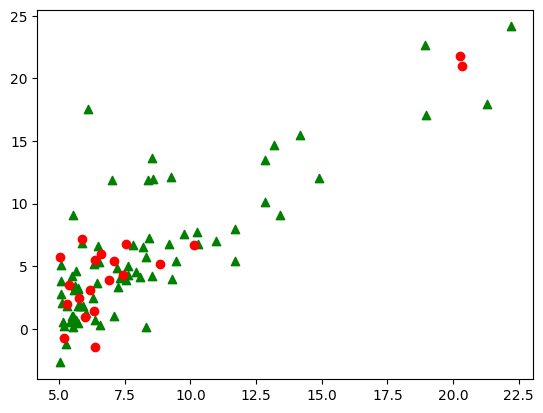

In [48]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [49]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
n = X.shape[1]
theta = np.zeros(n)

Для спрощення записів аліас для вектора передбачуваних значень

In [50]:
y = y_train[:]

У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [51]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
32.07712034603767


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [52]:
alpha = 0.01
max_num_iters = int(1e10)
eps = 1e-9

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: 5.84; Theta 1: 4.59

In [53]:
new_theta, Js = gradient_descent(X, y, theta, alpha, max_num_iters, eps)
print("Theta vector: ", new_theta.flatten())

Theta vector:  [5.91903049 4.36819693]


Відображення штрафної функції як функції від thetha0, thetha1.

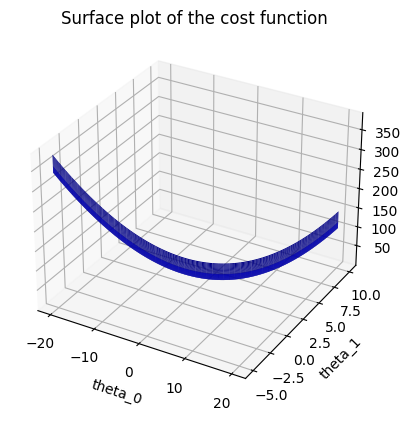

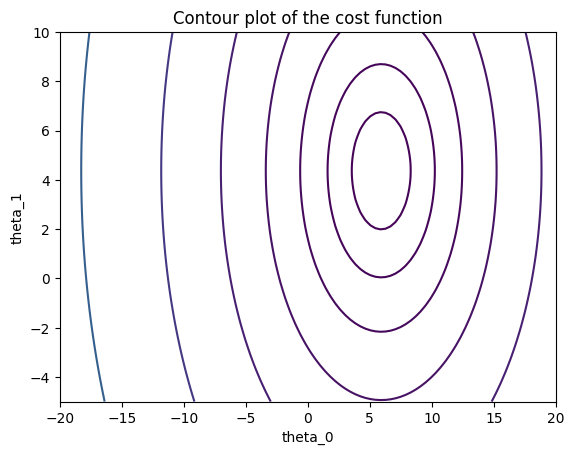

In [54]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

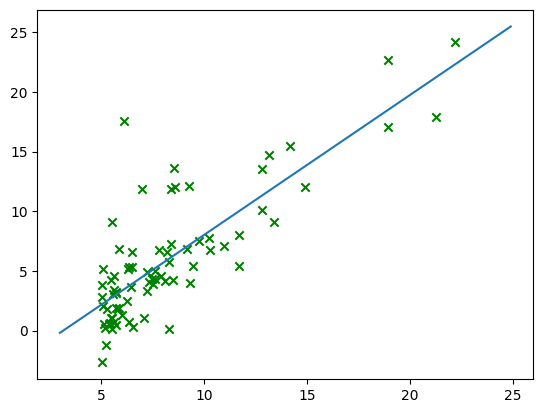

In [55]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*(x-mean)/std

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [56]:
X_test_norm = (X_test - mean) / std
X_test_norm = prepare_X(X_test_norm)
y_pred = hypothesis(X_test_norm, new_theta)
error = np.abs(np.divide(y_test - y_pred, y_test)) * 100

data = {}
for i in range(X_test.shape[1]):
    data[f'X_test_{i+1}'] = X_test[:, i]
data['y_test'] = y_test
data['y_pred'] = y_pred
data['error'] = error

df = pd.DataFrame(data)
print(df)
print(cost_function(X_test_norm, y_test, new_theta))

    X_test_1    y_test     y_pred       error
0     6.8825   3.91150   4.354856   11.334676
1     7.0708   5.38930   4.575711   15.096373
2    20.3410  20.99200  20.140205    4.057712
3     6.1891   3.13860   3.541573   12.839274
4     6.3589  -1.42110   3.740730  363.227801
5     5.0365   5.70140   2.189700   61.593650
6     6.0020   0.92695   3.322126  258.393182
7     8.8254   5.16940   6.633665   28.325631
8     6.3534   5.49740   3.734279   32.071900
9     5.3054   1.98690   2.505090   26.080323
10    6.3328   1.42330   3.710118  160.670121
11    7.5402   6.75040   5.126266   24.059818
12    7.4239   4.28850   4.989859   16.354410
13    5.7737   2.44060   3.054355   25.147695
14    6.5894   5.99660   4.011082   33.110736
15    5.1793  -0.74279   2.357188  417.342509
16    5.3794   3.51290   2.591884   26.218115
17   20.2700  21.76700  20.056930    7.856250
18    5.8707   7.20290   3.168125   56.015979
19   10.1360   6.67990   8.170856   22.320030
2.4136020477754467
